<a href="https://colab.research.google.com/github/bhoomikaagrawal16/Compute-tasks/blob/main/Task%206/Decision_Tree_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

**Splitting Data**

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [6]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_dt = clf_dt.predict(X_test)

**Evaluating Model**

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6883116883116883


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



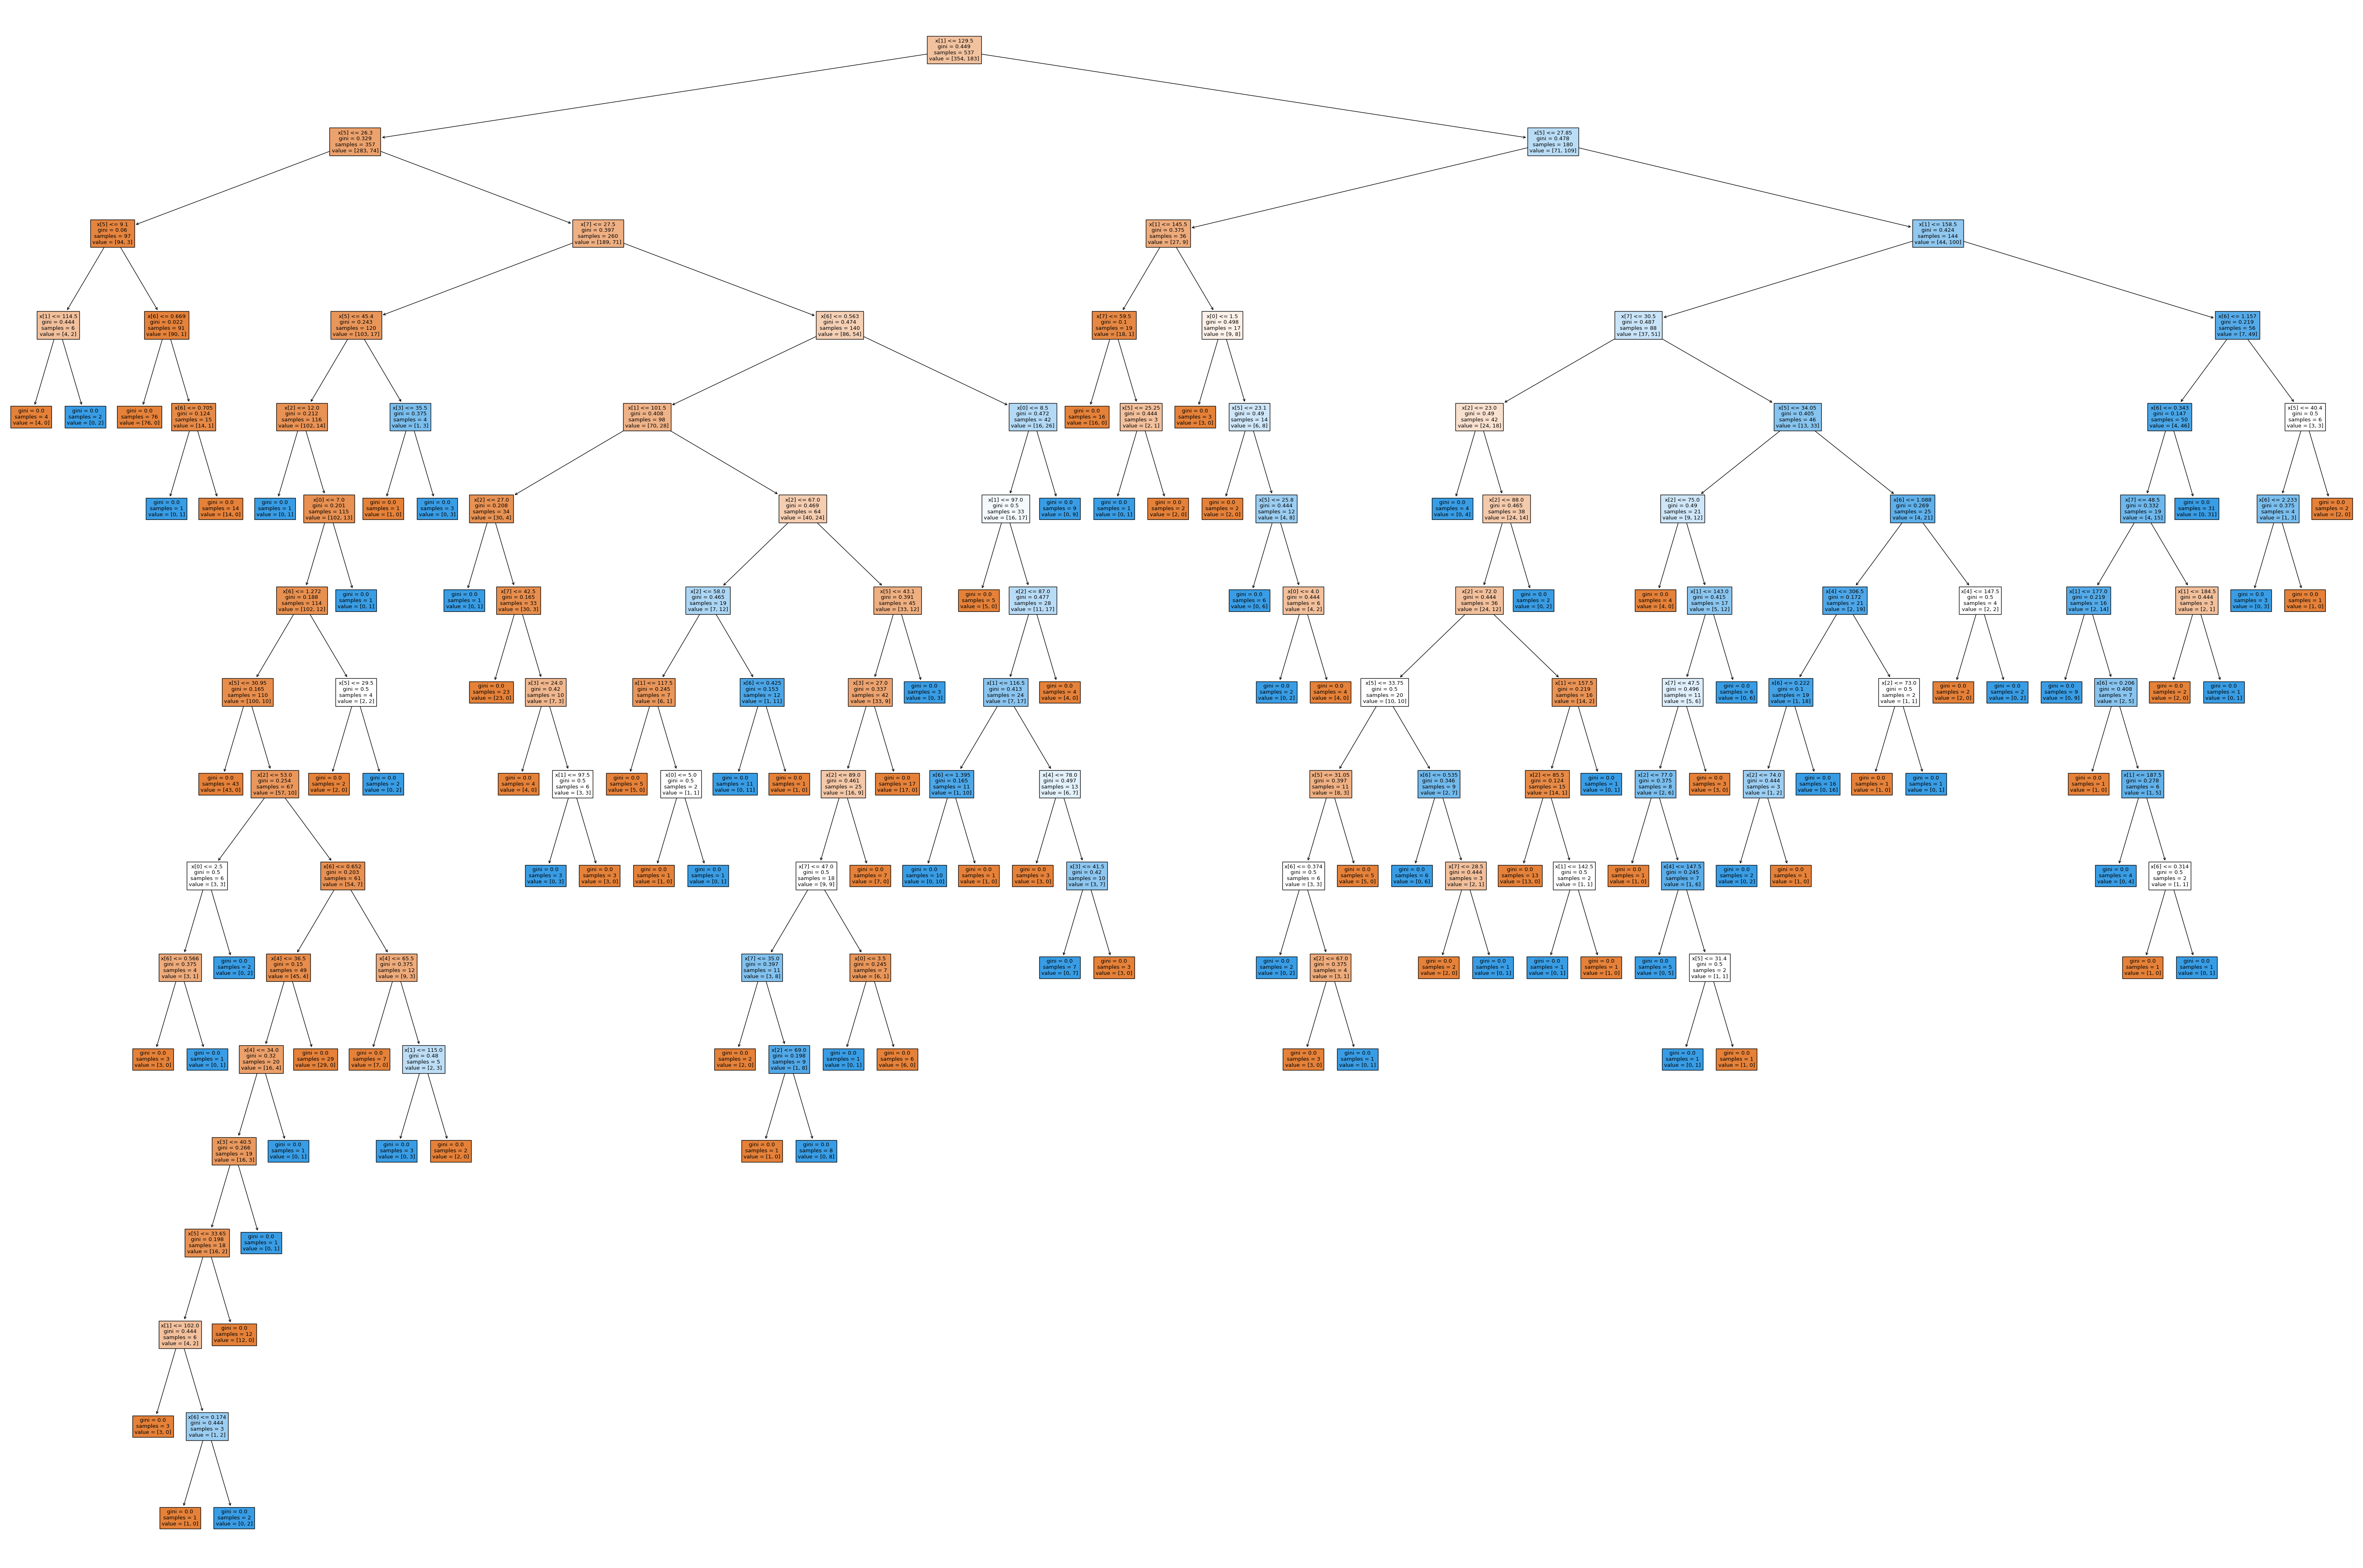

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

plt.figure(figsize=(75,50))
tree.plot_tree(clf_dt ,filled = True)
plt.show()

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4],
    'min_samples_split': [7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a base Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Grid search for best parameters
grid_search = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the model
best_clf_dt = DecisionTreeClassifier(**best_params)
best_clf_dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_best_dt = best_clf_dt.predict(X_test)

# Model Accuracy with best parameters
print("Decision Tree Accuracy with Best Parameters:", metrics.accuracy_score(y_test, y_pred_best_dt))

Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 7}
Decision Tree Accuracy with Best Parameters: 0.7705627705627706


**Visualizing Decision Trees**

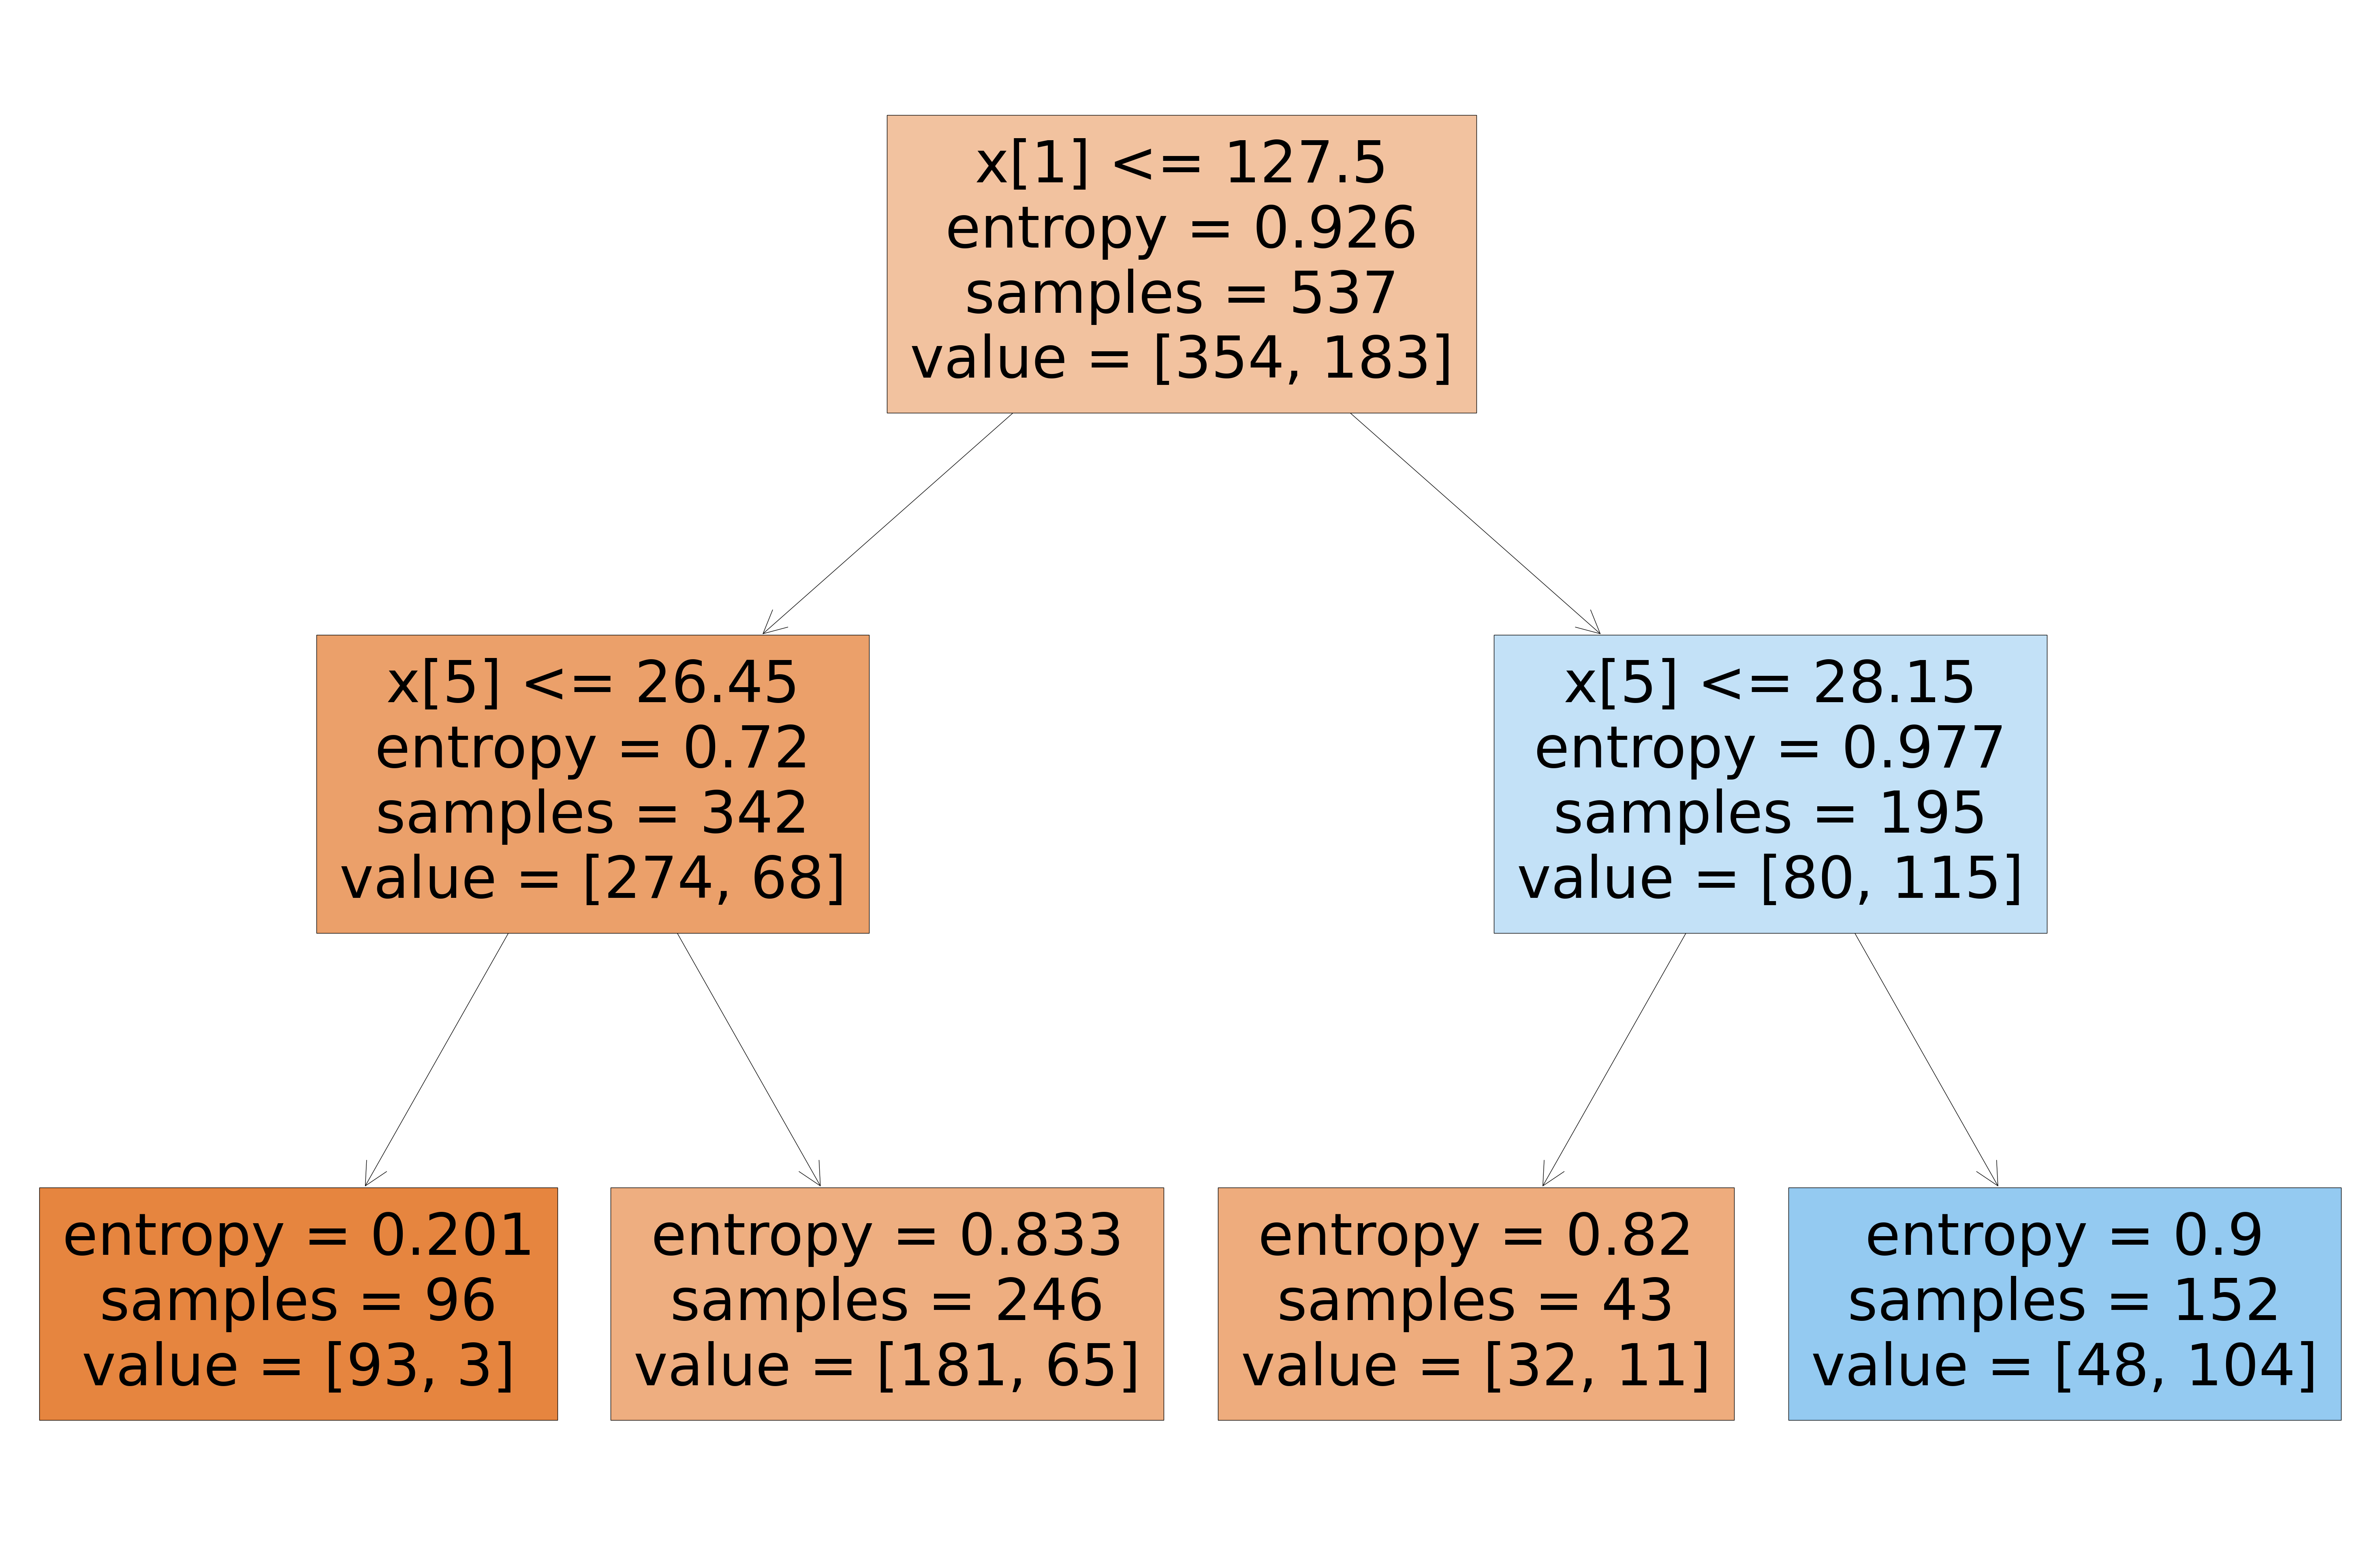

In [10]:
plt.figure(figsize=(75,50))
tree.plot_tree(best_clf_dt,filled = True)
plt.show()

**Implement Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Create RandomForest Tree classifer object with best parameters
clf_rf = RandomForestClassifier(**best_params, n_estimators=100)

# Train RandomForest Tree Classifer
clf_rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7705627705627706


If the model overfitting try out different way to fix it!!

In [13]:
train_accuracy = metrics.accuracy_score(y_train, best_clf_dt.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, y_pred_best_dt)
print(f"Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.7635009310986964, Test Accuracy: 0.7705627705627706
The model is not overfitting.


### All the best!!! I hope you will Enjoy the Task!